```
Gautam Ahuja
Introduction to Machine Learning
Raghavendra Singh
Assignment 3 Code & Report
Implement Clustering
```

In [1]:
from sklearn.metrics.cluster import contingency_matrix
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', parser='pandas')

In [3]:
# Convert data and target to numpy arrays
X = np.array(mnist.data)
y = np.array(mnist.target)

In [4]:
# Define the number of samples to select from each class.
# Our total samples needs to be 30,000 so we select 3000 from each class to ensure its balanced in terms of classes
samples_per_class = 3000
# Select samples from each class
selected_indices = []
for class_label in np.unique(y):
    class_indices = np.where(y == class_label)[0]
    np.random.shuffle(class_indices)
    selected_indices.extend(class_indices[:samples_per_class])

# Extract the selected samples
X_selected = X[selected_indices]
y_selected = y[selected_indices]

# Shuffle the selected samples
shuffle_indices = np.arange(len(X_selected))
np.random.shuffle(shuffle_indices)
X_selected = X_selected[shuffle_indices]
y_selected = y_selected[shuffle_indices]

To calculate the purity of clustering results using the class labels y, we can use the following formula:

```purity = (1/n) * sum(max(count(c, l)))```

where ```n``` is the total number of data points, ```c``` is a cluster, ```l``` is a class label, and ```count(c, l)``` is the number of data points in cluster ```c``` that belong to class ```l```. The purity score ranges from ```0``` to ```1```, where ```1``` indicates that all data points in each cluster belong to the same class.

Here's an example code that uses ```sklearn.cluster.KMeans```, ```sklearn.cluster.DBSCAN```, and ```sklearn.cluster.MeanShift``` to cluster the ```MNIST``` dataset and calculate the purity of the clustering results using the class labels:


The Gini Index is a measure for the impurity of a clustering result. It is defined as follows:

```gini = 1 - sum(p_i^2)```

where ```p_i``` is the fraction of data points in cluster ```i```. The Gini Index ranges from ```0``` to ```1```, where ```0``` indicates that all data points in each cluster belong to the same class.

In [5]:
# Calculate the gini index
def gini_index(cm):
    # Calculate the sum of squares
    sum_squares = np.sum(cm ** 2)
    # Calculate the sum of rows
    sum_rows = np.sum(cm, axis=1)
    # Calculate the sum of columns
    sum_cols = np.sum(cm, axis=0)
    # Calculate the sum of squares of rows
    sum_squares_rows = np.sum(sum_rows ** 2)
    # Calculate the sum of squares of columns
    sum_squares_cols = np.sum(sum_cols ** 2)
    # Calculate the gini index
    gini = (sum_squares / sum_squares_rows) - (sum_squares / sum_squares_cols)
    return gini

# K-Means Clustering

In [19]:
from sklearn.cluster import KMeans

# Run KMeans on the selected samples
kmeans = KMeans(n_init='auto')
kmeans.fit(X_selected)

KMeans(n_init='auto')

In [20]:
# Print the cluster centers and cluster labels
print("Cluster Labels: \n", kmeans.labels_)
print("Cluster Labels Shape: \n", kmeans.labels_.shape)

Cluster Labels: 
 [7 6 3 ... 0 5 3]
Cluster Labels Shape: 
 (30000,)


In [21]:
# Calculate the contingency matrix
cm = contingency_matrix(y_selected, kmeans.labels_)
# Calculate the purity
purity = np.sum(np.amax(cm, axis=0)) / np.sum(cm)
print(f'KMeans purity: {purity:.3f}')

KMeans purity: 0.566


In [22]:
# Gini Index
print("Gini Index for KMeans: \n", gini_index(cm))

Gini Index for KMeans: 
 0.1300440652978399


### Purity Increases with high level of clusters

In [13]:
from sklearn.cluster import KMeans
# Run KMeans on the selected samples
kmeans = KMeans(n_clusters=200, random_state=0, n_init = 'auto')
kmeans.fit(X_selected)

KMeans(n_clusters=200, n_init='auto', random_state=0)

In [14]:
# Print the cluster centers and cluster labels
print("Cluster Labels: \n", kmeans.labels_)
print("Cluster Labels Shape: \n", kmeans.labels_.shape)

Cluster Labels: 
 [ 22 101 189 ...  80  74 189]
Cluster Labels Shape: 
 (30000,)


In [15]:
# Calculate the contingency matrix
cm = contingency_matrix(y_selected, kmeans.labels_)
# Calculate the purity
purity = np.sum(np.amax(cm, axis=0)) / np.sum(cm)
print(f'KMeans purity: {purity:.3f}')

KMeans purity: 0.901


In [12]:
# Gini Index
print("Gini Index for KMeans: \n", gini_index(cm))

Gini Index for KMeans: 
 0.0129080908160778


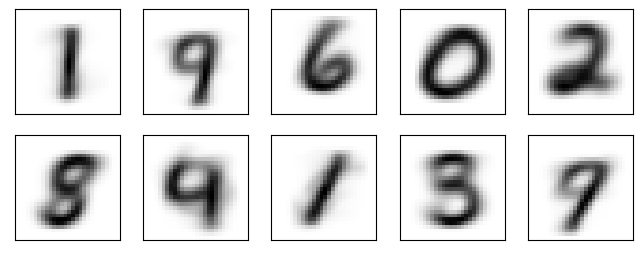

In [25]:
# Plot the cluster centers
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
plt.show()

# Clustering using DBSCAN

DBSCAN - Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.

In [22]:
from sklearn.cluster import DBSCAN
# Run DBSCAN on the selected samples
db = DBSCAN(eps=5, min_samples=5)#DBSCAN()
db.fit(X_selected)

# Calculate the contingency matrix
cm = contingency_matrix(y_selected, db.labels_)

# Calculate the purity
purity = np.sum(np.amax(cm, axis=0)) / np.sum(cm)
print(f'DBSCAN purity: {purity:.3f}')

DBSCAN purity: 0.100


In [24]:
# Gini Index
print("Gini Index for DBSCAN: ", gini_index(cm))

Gini Index for DBSCAN:  0.9


In [16]:
from sklearn.cluster import DBSCAN
# Run DBSCAN on the selected samples
dbscan = DBSCAN()
dbscan.fit(X_selected)

# Calculate the contingency matrix
cm = contingency_matrix(y_selected, dbscan.labels_)

# Calculate the purity
purity = np.sum(np.amax(cm, axis=0)) / np.sum(cm)
print(f'DBSCAN purity: {purity:.3f}')

DBSCAN purity: 0.100


In [17]:
# Gini Index
print("Gini Index for DBSCAN: ", gini_index(cm))

Gini Index for DBSCAN:  0.9


The reason why we are getting bad results is due to the inherit nature of DBSCAN. It is not great for our MNIST dataset because it is not a density based dataset. It is a distance based dataset. DBSCAN is good for datasets where the clusters are of similar density. In our case, the clusters are of similar distance.

# Clustering using MeanShift

MeanShift has a high complexity and is very slow. It is not suitable for clustering large datasets. We will reduce the size of images in the MNIST dataset to 14x14 pixels to speed up the clustering process.

In [45]:
from sklearn.cluster import MeanShift

# Run MeanShift on the selected samples
meanshift = MeanShift()
meanshift.fit(X_selected)

# Calculate the contingency matrix
cm = contingency_matrix(y_selected, meanshift.labels_)

# Calculate the purity
purity = np.sum(np.amax(cm, axis=0)) / np.sum(cm)
print(f'MeanShift purity: {purity:.3f}')

MeanShift purity: 0.100


In [16]:
from sklearn.cluster import MeanShift

# Run MeanShift on the selected samples
meanshift = MeanShift(bandwidth=100, seeds=X_selected, bin_seeding=False)
meanshift.fit(X_selected)

# Calculate the contingency matrix
cm = contingency_matrix(y_selected, meanshift.labels_)

# Calculate the purity
purity = np.sum(np.amax(cm, axis=0)) / np.sum(cm)
print(f'MeanShift purity: {purity:.3f}')

In [ ]:
# Gini index for MeanShift
print("Gini index for MeanShift: \n", gini_index(cm))

Gini index for MeanShift: 
 -0.9996666666666667
